In [1]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
#数据加载
all_data=pd.read_csv('./data/processed_Zhengqi_data.csv')
display(all_data)
cond=all_data['label']=='train'
train_data=all_data[cond]
train_data.drop(labels='label',axis=1,inplace=True)
train_data.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V29,V30,V31,V35,V36,V37,target,label
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-2.551,0.396,...,-0.630,-1.674,0.171,-4.488,-5.793,-2.131,-2.564,0.597,NaN,test
4809,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-2.525,-1.786,...,-0.204,-1.773,1.297,-0.613,-7.698,-2.131,-2.564,1.215,NaN,test
4810,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-2.529,-1.151,...,1.057,-1.585,0.552,0.125,-6.111,-1.537,-2.544,1.612,NaN,test
4811,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.560,-1.512,...,0.800,-1.410,0.318,1.086,-5.268,-1.537,-2.549,1.431,NaN,test


,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V29,V30,V31,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.356,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.357,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.355,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.352,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.352,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384


In [3]:
#最值归一化
columns=list(all_data.columns)
columns.remove('label')
columns.remove('target')
all_data[columns].describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V20,V23,V24,V27,V29,V30,V31,V35,V36,V37
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,0.000080,0.000082,-0.000043,-0.000013,0.000085,0.000118,0.000116,0.000049,-0.000089,0.000071,...,-0.000056,0.000022,-0.000264,0.000046,0.000014,0.000006,-0.000004,-0.000079,-0.000110,0.000083
std,1.000013,1.000016,1.000007,0.999995,1.000015,1.000035,1.000030,0.999994,1.000017,1.000014,...,0.999991,1.000003,1.000184,0.999999,0.999997,0.999993,0.999999,1.000062,1.000019,1.000017
min,-4.814000,-5.488000,-4.283000,-3.956000,-4.921000,-5.649000,-5.625000,-6.059000,-2.584000,-5.505000,...,-3.402000,-5.552000,-1.344000,-6.874000,-2.912000,-4.507000,-7.698000,-7.477000,-2.608000,-3.630000
25%,-0.468000,-0.319000,-0.625000,-0.651000,-0.428000,-0.494000,-0.368000,-0.429000,-0.476000,-0.434000,...,-0.639000,-0.187000,-1.191000,0.056000,-0.721000,-0.301000,-0.300000,-0.349000,-0.485000,-0.666000
50%,0.245000,0.237000,0.105000,0.073000,0.114000,0.191000,0.198000,0.231000,0.133000,0.125000,...,-0.066000,0.331000,0.094000,0.270000,-0.097000,0.038000,0.217000,0.364000,0.115000,-0.043000
75%,0.666000,0.595000,0.698000,0.704000,0.576000,0.705000,0.684000,0.637000,0.626000,0.604000,...,0.496000,0.360000,0.821000,0.399000,0.623000,0.469000,0.578000,0.364000,0.647000,0.647000
max,2.121000,2.120000,2.828000,2.603000,4.475000,1.895000,1.918000,2.408000,4.830000,4.011000,...,4.056000,1.906000,2.423000,0.925000,4.580000,3.139000,2.013000,2.324000,5.238000,3.021000


In [4]:
def norm_min_max(col):
    """
    对一列数据进行最小-最大规范化处理。

    参数:
    col (pd.Series): 需要进行规范化处理的数据列。

    返回:
    pd.Series: 规范化处理后的数据列。
    """
    # 计算数据列的最小值和最大值，并用以规范化数据列
    return (col-col.min())/(col.max()-col.min())

# 对指定的列进行最小-最大规范化处理
all_data_normed = all_data[columns].apply(norm_min_max, axis=0)

# 显示规范化后数据的基本统计信息
all_data_normed.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V20,V23,V24,V27,V29,V30,V31,V35,V36,V37
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,0.694172,0.721357,0.602300,0.603139,0.523743,0.748823,0.745740,0.715607,0.348518,0.578507,...,0.456147,0.744438,0.356712,0.881401,0.388683,0.589459,0.792709,0.762873,0.332385,0.545795
std,0.144198,0.131443,0.140628,0.152462,0.106430,0.132560,0.132577,0.118105,0.134882,0.105088,...,0.134083,0.134085,0.265512,0.128221,0.133475,0.130786,0.102976,0.102037,0.127456,0.150356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.626676,0.679416,0.514414,0.503888,0.478182,0.683324,0.696938,0.664934,0.284327,0.532892,...,0.370475,0.719362,0.040616,0.888575,0.292445,0.550092,0.761816,0.727273,0.270584,0.445647
50%,0.729488,0.752497,0.617072,0.614270,0.535866,0.774125,0.771974,0.742884,0.366469,0.591635,...,0.447305,0.788817,0.381736,0.916015,0.375734,0.594428,0.815055,0.800020,0.347056,0.539317
75%,0.790195,0.799553,0.700464,0.710474,0.585036,0.842259,0.836405,0.790835,0.432965,0.641971,...,0.522660,0.792706,0.574728,0.932555,0.471837,0.650798,0.852229,0.800020,0.414861,0.643061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# 实例化MinMaxScaler，用于后续的数据归一化处理
min_max_scaler = preprocessing.MinMaxScaler()

# 使用MinMaxScaler对选定的列进行数据归一化处理
# fit_transform方法既拟合数据，又转换数据
all_data_normed = min_max_scaler.fit_transform(all_data[columns])

# 将归一化后的数据转换为DataFrame格式，便于后续的数据操作和分析
all_data_normed = pd.DataFrame(all_data_normed, columns=columns)

# 显示归一化后数据的基本统计信息，如均值、标准差等
all_data_normed.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V20,V23,V24,V27,V29,V30,V31,V35,V36,V37
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,...,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,0.694172,0.721357,0.602300,0.603139,0.523743,0.748823,0.745740,0.715607,0.348518,0.578507,...,0.456147,0.744438,0.356712,0.881401,0.388683,0.589459,0.792709,0.762873,0.332385,0.545795
std,0.144198,0.131443,0.140628,0.152462,0.106430,0.132560,0.132577,0.118105,0.134882,0.105088,...,0.134083,0.134085,0.265512,0.128221,0.133475,0.130786,0.102976,0.102037,0.127456,0.150356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.626676,0.679416,0.514414,0.503888,0.478182,0.683324,0.696938,0.664934,0.284327,0.532892,...,0.370475,0.719362,0.040616,0.888575,0.292445,0.550092,0.761816,0.727273,0.270584,0.445647
50%,0.729488,0.752497,0.617072,0.614270,0.535866,0.774125,0.771974,0.742884,0.366469,0.591635,...,0.447305,0.788817,0.381736,0.916015,0.375734,0.594428,0.815055,0.800020,0.347056,0.539317
75%,0.790195,0.799553,0.700464,0.710474,0.585036,0.842259,0.836405,0.790835,0.432965,0.641971,...,0.522660,0.792706,0.574728,0.932555,0.471837,0.650798,0.852229,0.800020,0.414861,0.643061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#数据正态化(Box-Cox变换)
from sympy import true


cond=all_data['label']=='train'
train_data=all_data[cond]
train_data.drop(labels='label',axis=1,inplace=True)
train_data.head()



,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V23,V24,V27,V29,V30,V31,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-0.940,-0.073,...,0.356,0.800,0.168,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,0.188,-0.134,...,0.357,0.801,0.338,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,0.874,-0.072,...,0.355,0.961,0.326,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,0.011,-0.014,...,0.352,1.435,0.277,0.015,0.417,0.279,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-0.251,0.199,...,0.352,0.881,0.332,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384


Text(0.5, 1.0, 'corr=0.87')

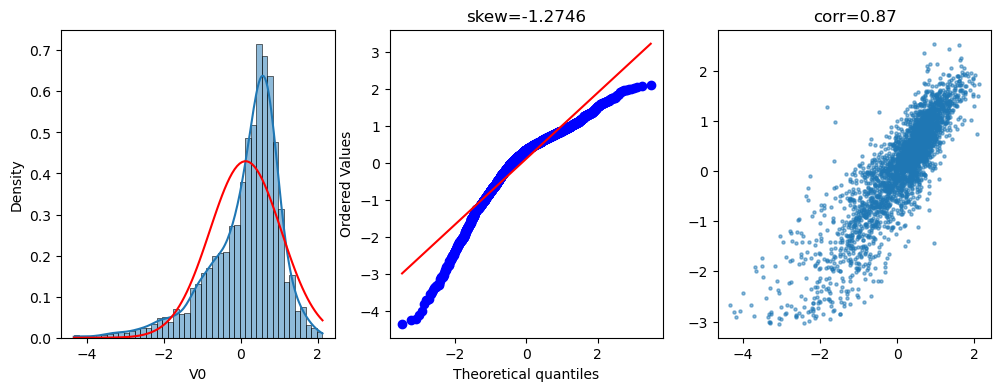

In [ ]:
# 创建画布并设置子图画布大小
plt.figure(figsiZe=(12,4))

# 绘制直方图及概率密度曲线
# 1. 创建第一个子图（1行3列布局中的第1个位置）
# 2. 使用seaborn绘制带核密度估计的直方图
# 3. 手动计算并绘制标准正态分布拟合曲线
#    - 使用numpy生成等间距x值序列
#    - 使用scipy.stats.norm.pdf计算理论概率密度值
#    - 使用红色实线绘制理论分布曲线
ax = plt.subplot(1,3,1)
sns.histplot(x=train_data['V0'], kde=True, stat="density")
x = np.linspace(min(train_data['V0']), max(train_data['V0']), 100)
plt.plot(x, stats.norm.pdf(x, *stats.norm.fit(train_data['V0'])), 'r')

# 绘制Q-Q图及偏度分析
# 1. 创建第二个子图（1行3列布局中的第2个位置）
# 2. 使用scipy.stats.probplot生成概率图
#    - 默认比较样本数据与标准正态分布
#    - 可视化数据分位数与理论分布的对应关系
# 3. 计算并显示偏度值（skewness）
#    - 偏度反映数据分布的不对称性
ax = plt.subplot(1,3,2)
stats.probplot(train_data['V0'],plot = ax)
plt.title('skew='+'{:.4f}'.format(stats.skew(train_data['V0'])))

# 绘制特征-目标相关性散点图
# 1. 创建第三个子图（1行3列布局中的第3个位置）
# 2. 绘制特征V0与目标值的散点图
#    - 点大小设置为5
#    - 透明度设置为0.5
# 3. 计算并显示皮尔逊相关系数
#    - 使用np.corrcoef计算相关矩阵
#    - 提取[0][1]位置的相关系数值
ax = plt.subplot(1,3,3)
plt.scatter(train_data['V0'], train_data['target'],s = 5,alpha=0.5)
plt.title('corr='+'{:.2f}'.format(np.corrcoef(train_data['V0'],train_data['target'])[0][1]))

In [ ]:
"""
生成训练数据特征的可视化分析图表，包含特征分布、正态性检验及与目标变量相关性分析。

该函数通过多子图形式展示训练数据集中各特征列的统计特性：
1. 特征分布直方图与核密度估计曲线
2. 分位数-分位数概率图(Q-Q图)
3. 特征与目标变量的散点图及相关系数

Parameters:
    train_data (pandas.DataFrame): 包含特征列和'target'目标列的数据集
                                  要求至少包含两个特征列和一个'target'列

Returns:
    None: 直接生成并显示包含多个分析子图的复合图表
"""

# 初始化绘图布局参数
# 设置每行显示3个子图
fcols=3
# 获取所有列名并排除目标列
columns=list(train_data.columns)
columns.remove('target')
# 计算需要显示的行数
frows=len(columns)

# 创建画布并设置图表整体布局
plt.figure(figsiZe=(4*fcols,4*frows))

# 初始化子图计数器
i=0

# 遍历所有特征列生成分析图表
for col in columns:
    # 提取当前特征与目标列并删除缺失值
    feature=train_data[[col,'target']].dropna()

    # 子图1: 特征分布直方图与正态分布拟合曲线
    i+=1
    plt.subplot(frows,fcols,i)
    sns.histplot(data=train_data,x=col,kde=True,stat='density')
    x = np.linspace(min(train_data[col]), max(train_data[col]), 100)
    plt.plot(x, stats.norm.pdf(x, *stats.norm.fit(train_data[col])), 'r')
    plt.title(col)
    plt.xlabel('')

    # 子图2: 分位数-分位数概率图(Q-Q图)与偏度计算
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(feature[col],plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(feature[col])))
    plt.xlabel('')
    plt.ylabel('')

    # 子图3: 特征与目标变量的散点图及相关系数
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(feature[col],feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(feature[col],feature['target'])[0][1]))


# 绘图显示Box-Cox变换对数据分布影响
$ y(\lambda) = 
\begin{cases} 
\dfrac{y^\lambda - 1}{\lambda}, & \lambda \neq 0 \\
\ln(y), & y = 0 
\end{cases}
$


In [ ]:
from matplotlib.pyplot import sca
from sklearn.preprocessing import PowerTransformer

fcols=6
columns=list(train_data.columns)
columns.remove("target")
frows=len(columns)
plt.figure(figsiZe=(4*fcols,4*frows))
i=0


for col in columns:
    feature=train_data[[col,'target']].dropna()

    i+=1
    plt.subplot(frows,fcols,i)
    sns.histplot(data=train_data,x=col,kde=True,stat='density')
    x = np.linspace(min(train_data[col]), max(train_data[col]), 100)
    plt.plot(x, stats.norm.pdf(x, *stats.norm.fit(train_data[col])), 'r')
    plt.title(col)
    plt.xlabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(feature[col], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(feature[col])))
    plt.xlabel('')
    plt.ylabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(feature[col], feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(feature[col], feature['target'])[0][1]))

    # Box-Cox转变，视图可视化
    i+=1
    plt.subplot(frows,fcols,i)
    pt = PowerTransformer(method='yeo-johnson', standardiZe=True)
    transformed = pt.fit_transform(feature[[col]])
    feature[col] = transformed.flatten()
    trans_feature=feature[col].dropna()
    trans_feature = norm_min_max(trans_feature)
    sns.histplot(x=trans_feature,kde=True,stat="density")
    x=np.linspace(min(trans_feature),max(trans_feature),100)
    plt.plot(x,stats.norm.pdf(x,*stats.norm.fit(trans_feature)),'r')
    plt.title(col+'Tramsformed')
    plt.xlabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_feature, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_feature)))
    plt.xlabel('')
    plt.ylabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_feature, feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_feature,feature['target'])[0][1]))








In [ ]:
# 进行Box-Cox变换
columns=list(all_data.columns)
# 删除标签列索引
columns.remove('label')
# 删除目标值
columns.remove('target')
pt = PowerTransformer(method='yeo-johnson', standardiZe=True)
all_data[columns] = pt.fit_transform(all_data[columns])
display(all_data)

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V29,V30,V31,V35,V36,V37,target,label
0,0.503254,-0.251407,-0.234360,0.358147,0.386057,-1.590779,-1.855576,-0.649080,-0.963943,-0.218695,...,0.795572,-0.281272,0.232078,-0.045502,-0.885678,-3.106644,-2.217068,-3.725153,0.175,train
1,1.160351,0.317772,-0.024084,0.530549,0.090765,-1.451874,-1.855576,0.179459,0.095809,-0.280597,...,0.796598,0.334008,-0.035934,-0.027326,-0.239491,0.249405,-0.434784,-0.721780,0.676,train
2,1.240218,0.525901,0.153960,0.318531,0.001281,-1.332727,-1.855576,0.265750,0.888083,-0.217668,...,0.960979,0.284288,0.087172,0.277236,0.097733,0.249405,0.756295,-0.575568,0.633,train
3,0.763716,0.213959,0.205745,0.102774,0.562921,-1.227369,-1.730094,0.275348,-0.089953,-0.157383,...,1.451189,0.091530,0.111537,0.353803,0.100734,0.249405,0.249792,-0.088146,0.206,train
4,0.685418,0.642967,0.180867,0.148528,0.251956,-1.143549,-1.730094,0.155667,-0.348897,0.076529,...,0.878714,0.309022,0.277939,1.378436,0.175486,0.249405,-0.383000,-0.003665,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,-1.328753,-1.461585,-2.611202,-0.497176,0.302807,-2.863466,-2.866739,-2.629131,-2.193315,0.309305,...,-0.638435,-1.953974,0.266278,-3.082190,-2.997743,-1.812736,-2.186824,0.611611,NaN,test
4809,-2.025036,-2.286872,-2.973116,-1.061972,-1.331187,-2.887652,-2.804326,-2.748586,-2.175002,-1.619323,...,-0.218700,-1.976668,1.256780,-0.781144,-3.410862,-1.812736,-2.186824,1.203244,NaN,test
4810,-1.987382,-2.326027,-2.823929,-0.476455,-1.243800,-2.645332,-2.573494,-3.030166,-2.177822,-1.160887,...,1.059888,-1.931899,0.622478,-0.026110,-3.073015,-1.465392,-2.173039,1.577014,NaN,test
4811,-2.008323,-2.354214,-2.733351,-0.733319,-1.242239,-2.456692,-2.410722,-2.871642,-2.199645,-1.427624,...,0.795572,-1.883113,0.406995,1.392119,-2.866688,-1.465392,-2.176487,1.407136,NaN,test


# 异常值过滤

In [19]:
# 导入数据分割工具
from sklearn.model_selection import train_test_split

# 获取训练数据
# 该函数用于从全局数据集中提取标记为"train"的数据，并分离特征和目标变量
def get_train_data():
    # 筛选训练数据
    train_data=all_data[all_data["label"]=="train"]
    # 提取目标变量
    y=train_data.target
    # 移除目标变量和标签，保留特征
    X=train_data.drop(["target","label"],axis=1)
    # 返回特征和目标变量
    return X,y

# 分割训练数据
# 该函数用于将标记为"train"的数据集分割为训练集和验证集
def split_train_data():
    # 筛选训练数据
    train_data=all_data[all_data["label"]=="train"]
    # 提取目标变量
    y=train_data.target
    # 移除目标变量和标签，保留特征
    X=train_data.drop(["target","label"],axis=1)
    # 分割数据集，20%作为验证集
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)
    # 返回训练集和验证集的特征及目标变量
    return X_train,X_valid,y_train,y_valid

# 获取测试数据
# 该函数用于从全局数据集中提取标记为"test"的数据，并移除不必要的列
def get_test_data():
    # 筛选测试数据，并重置索引
    test_data=all_data[all_data["label"]=="test"].reset_index(drop=True)
    # 移除标签和目标变量，返回测试数据的特征
    return test_data.drop(["label","target"],axis=1)

In [22]:
# 异常值过滤
from sklearn.metrics import mean_squared_error
def find_outliers(model,X,y,sigma=3):
    model.fit(X,y)
    y_pred=pd.Series(model.predict(X),index=y.index)

    resid=y-y_pred
    mean_resid=resid.mean()
    std_resid=resid.std()

    Z=(resid-mean_resid)/std_resid
    outliers=Z[abs(Z)>sigma].index

    print("R^2=",model.score(X,y))
    print("MSE=",mean_squared_error(y,y_pred))
    print("-----------------------------------")

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print("outliers:",len(outliers))
    print(outliers.tolist())

    # 真实值预测值散点图
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(y,y_pred,".")
    plt.plot(y.loc[outliers],y_pred.loc[outliers],"ro")
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    # 真实值和残差散点图
    plt.subplot(1,3,2)
    plt.plot(y,resid,".")
    plt.plot(y.loc[outliers],resid.loc[outliers],"ro")
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    # 直方图
    ax_133=plt.subplot(1,3,3)
    Z.plot.hist(bins=50,ax=ax_133)
    Z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('Z')

    plt.savefig("./export_data/outliers.png")

    return outliers


## 岭回归算法检测异常值

R^2= 0.8641990665543857
MSE= 0.1314353742926002
-----------------------------------
mean of residuals: 5.5357380729232184e-17
std of residuals: 0.3626029521671639
---------------------------------------
outliers: 30
[348, 884, 1046, 1069, 1145, 1164, 1310, 1458, 1493, 1523, 1530, 1704, 1874, 2002, 2159, 2160, 2279, 2528, 2620, 2625, 2645, 2667, 2668, 2669, 2696, 2697, 2769, 2807, 2842, 2863]


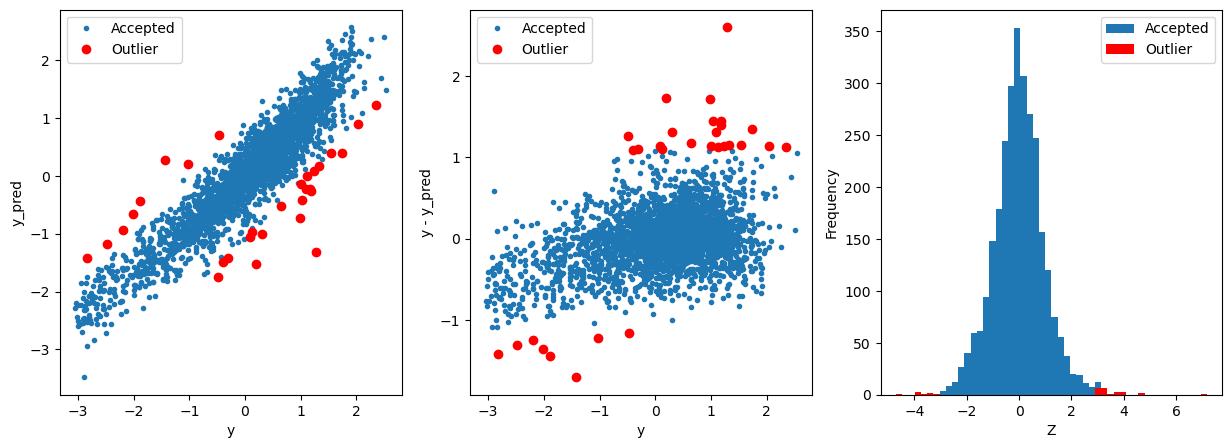

In [23]:
from sklearn.linear_model import Ridge
X_train, y_train = get_train_data()

# 使用岭回归查找异常值
outliers1 = find_outliers(Ridge(), X_train, y_train)